In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

from reservoirpy.datasets import mackey_glass, lorenz96, henon_map
from utils.dataGenerator import powerlawNoiseGenerator
from utils.dataPlots import plot_timeseries, plot_attractor

from core.models import EchoStateNetwork, SingleNodeDelayESN, TwoNodeDelayESN
from core.pipelines import StandardPipeline, DelayPipeline

from utils.plotting import predictionAnalysis, predictionAnalysisNDim, internalStatesHistogram
from utils.exporting import export_results

In [2]:
timeseries = mackey_glass(15000)
timeseries.shape

(15000, 1)

/Users/sashvqz/Downloads/TFGs/utils/dataPlots.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


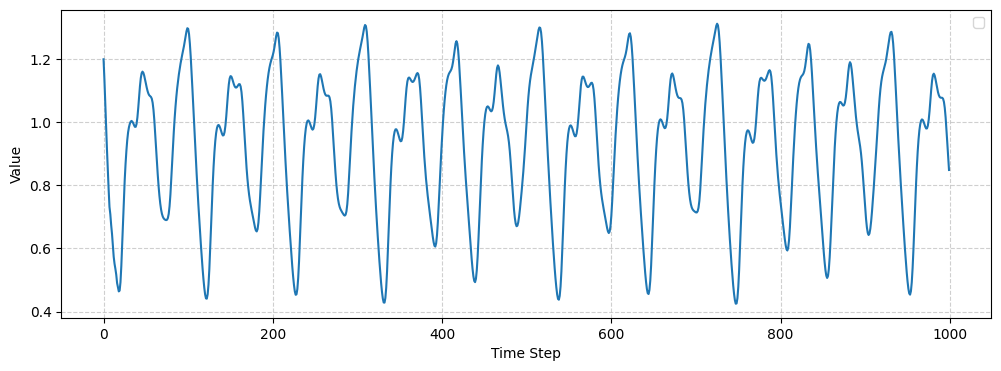

In [3]:
plot_timeseries(timeseries)

In [4]:
params = {
    'inputSize': 1,
    'numVirtualNodes': 347,
    'outputSize': 1,
    'theta': 0.04,
    'tau': 2.0,
    'eta': 0.5,
    'gamma': 0.1,
    'maskScaling': 0.1,
    'integrationStep': 0.1,
    'randomSeed': 42
}

In [5]:
model = SingleNodeDelayESN(**params)

In [6]:
pipeline = DelayPipeline(esn_model=model)

In [7]:
predictions, actuals, metrics, internal_states = pipeline.run(
    timeseries,
    trainRatio=0.7,
    predictionHorizon=1,
    washout_train=500,
    washout_pred=0,
)

In [8]:
metrics

{'mse': 5.219755026990861e-05,
 'rmse': np.float64(0.007224787212777177),
 'mae': 0.0028483072541772582,
 'nrmse': np.float64(0.008028829699472394)}

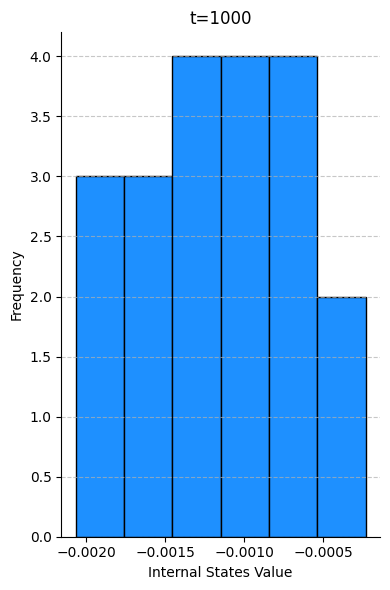

In [9]:
internalStatesHistogram(
    states=internal_states,
    time_step_index=1000,
    reservoir_size=params['numVirtualNodes'],
)

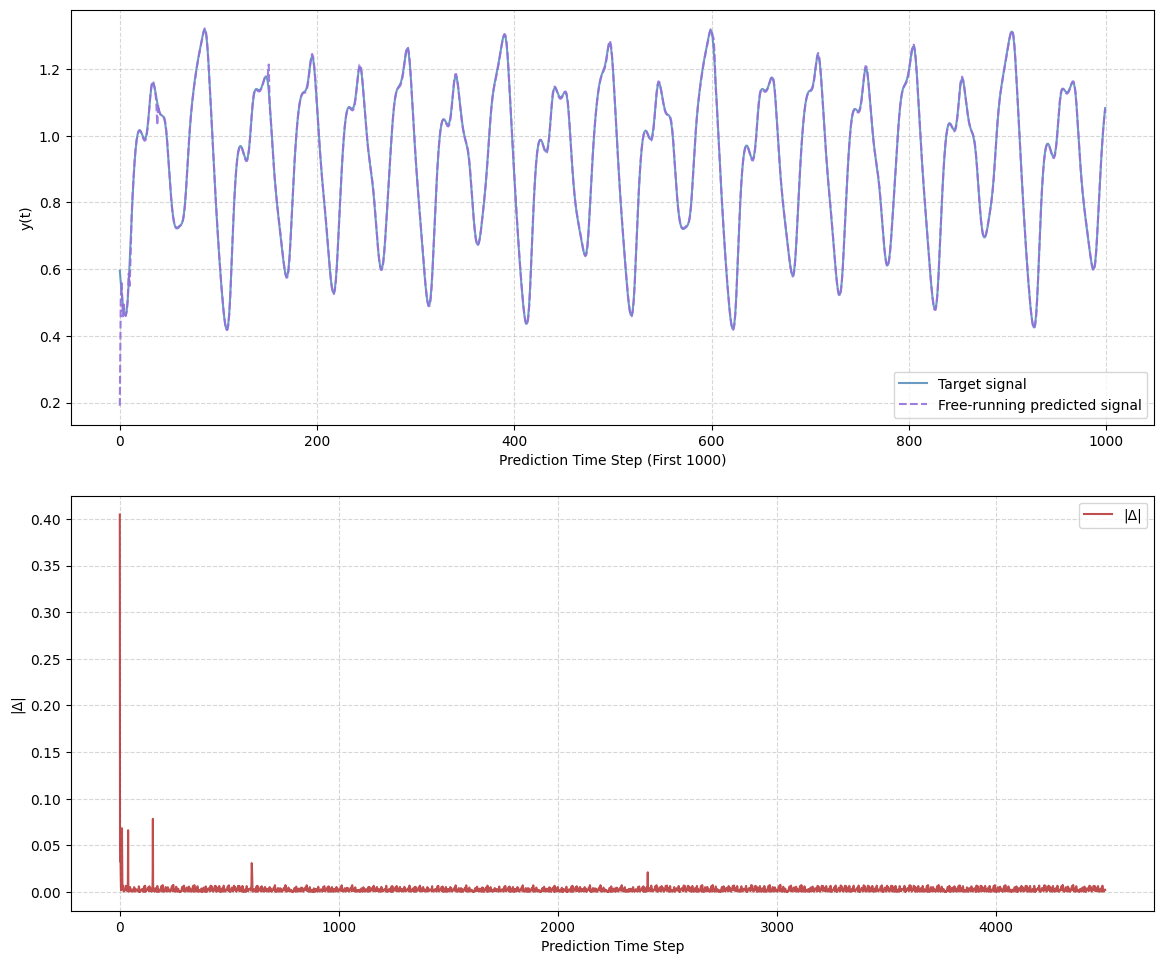

In [10]:
predictionAnalysis(predictions, actuals, zoom_limit=1000)

In [11]:
henonSeries = henon_map(n_timesteps=15000)
henonSeries.shape

(15000, 2)

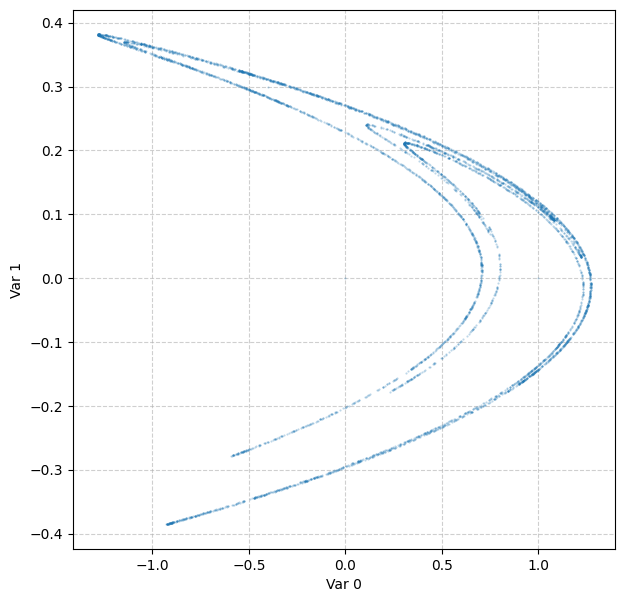

In [12]:
plot_attractor(henonSeries)

In [13]:
paramsHenon = {
    'inputSize': 2,          
    'numVirtualNodes': 800,
    'outputSize': 2,
    'theta': 0.04,
    'tau': 2.0, 
    'eta': 0.5, 
    'gamma': 0.1, 
    'maskScaling': 0.1, 
    'integrationStep': 0.1,
    'randomSeed': 42
}

In [14]:
modelHenon = SingleNodeDelayESN(**paramsHenon)

In [15]:
pipelineHenon = DelayPipeline(esn_model=modelHenon)

In [16]:
predictionsHenon, actualsHenon, metricsHenon, internal_statesHenon = pipelineHenon.run(
    henonSeries,
    trainRatio=0.7,
    predictionHorizon=1,
    washout_train=500,
    washout_pred=0,
)

In [17]:
metricsHenon

{'mse': 0.20484698059437673,
 'rmse': np.float64(0.45260024369677126),
 'mae': 0.2637749665871439,
 'nrmse': np.float64(0.27230045230651756)}

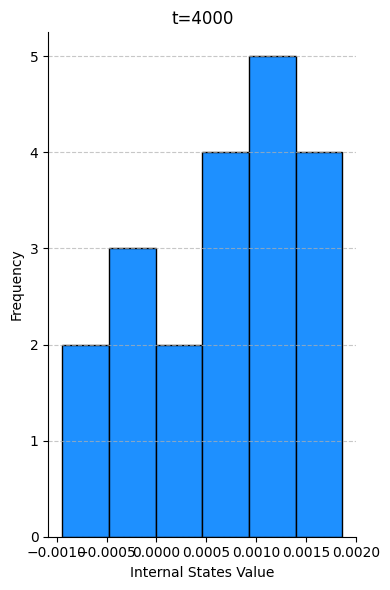

In [18]:
internalStatesHistogram(
    states=internal_statesHenon,
    time_step_index=4000,
    reservoir_size=paramsHenon['numVirtualNodes'],
)

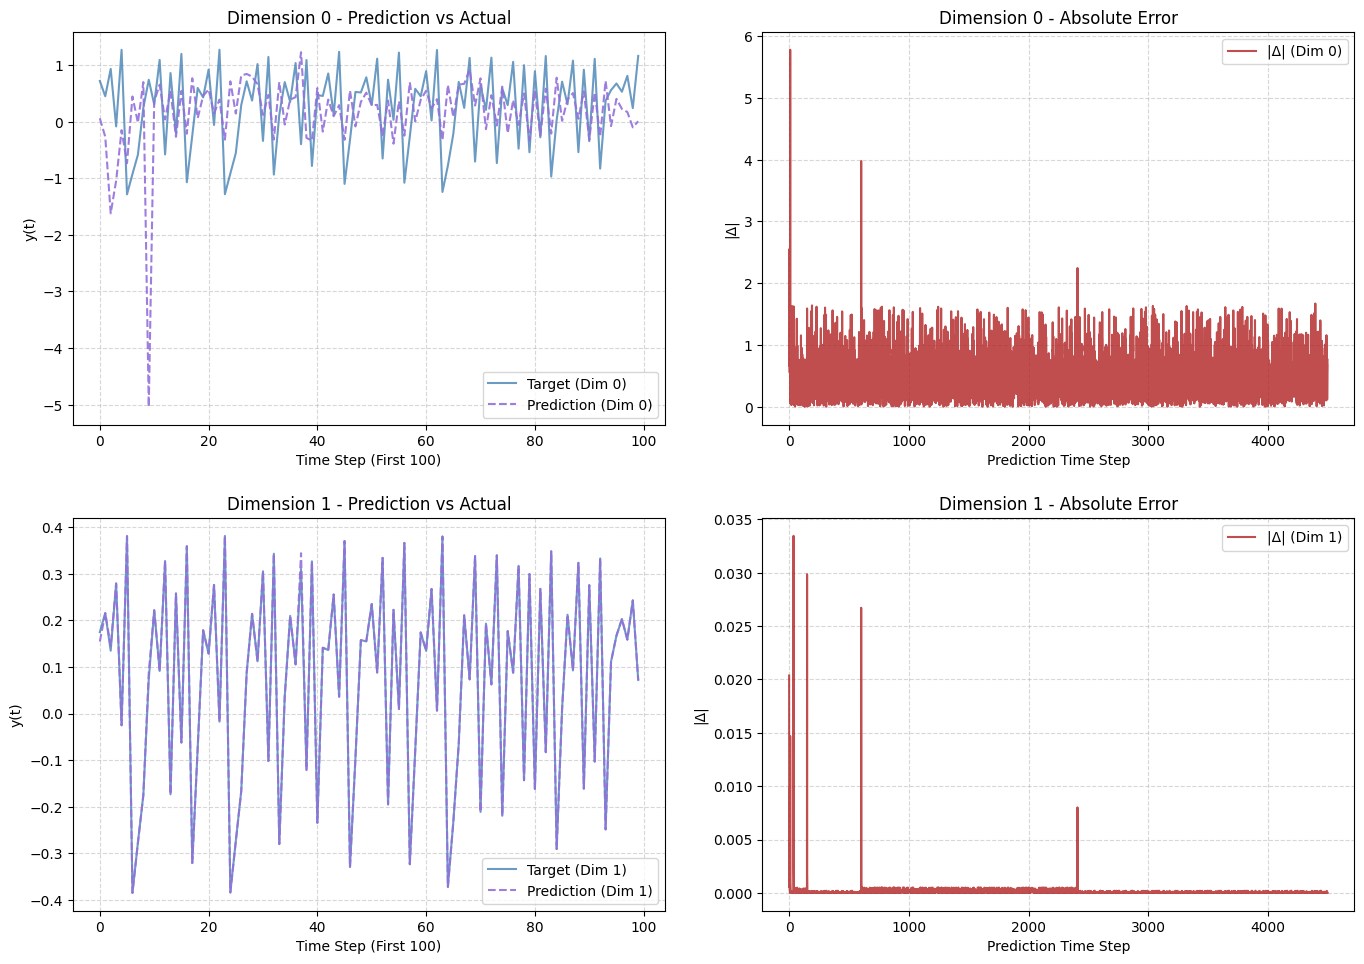

In [19]:
predictionAnalysisNDim(predictionsHenon, actualsHenon, zoom_limit=100)

In [20]:
params = {
    'inputSize': 1,
    'numVirtualNodes': 800,
    'outputSize': 1,
    'theta': 0.04,
    'tau': 2.0,
    'eta': 0.5,
    'gamma': 0.1,
    'maskScaling': 0.1,
    'integrationStep': 0.1,
    'randomSeed': 42
}

In [21]:
modelTwoNode = TwoNodeDelayESN(**params)

In [22]:
pipelineTwoNode = DelayPipeline(esn_model=modelTwoNode)

In [23]:
predictionsTwoNode, actualsTwoNode, metricsTwoNode, internal_statesTwoNode = pipelineTwoNode.run(
    timeseries,
    trainRatio=0.7,
    predictionHorizon=1,
    washout_train=500,
    washout_pred=0,
)

In [24]:
metricsTwoNode

{'mse': 0.0003934622788813334,
 'rmse': np.float64(0.01983588361735704),
 'mae': 0.0014184582655052142,
 'nrmse': np.float64(0.022043407897281955)}

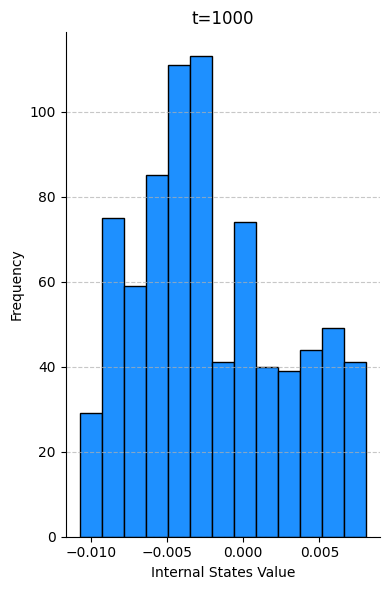

In [25]:
internalStatesHistogram(
    states=internal_statesTwoNode,
    time_step_index=1000,
    reservoir_size=params['numVirtualNodes'],
)

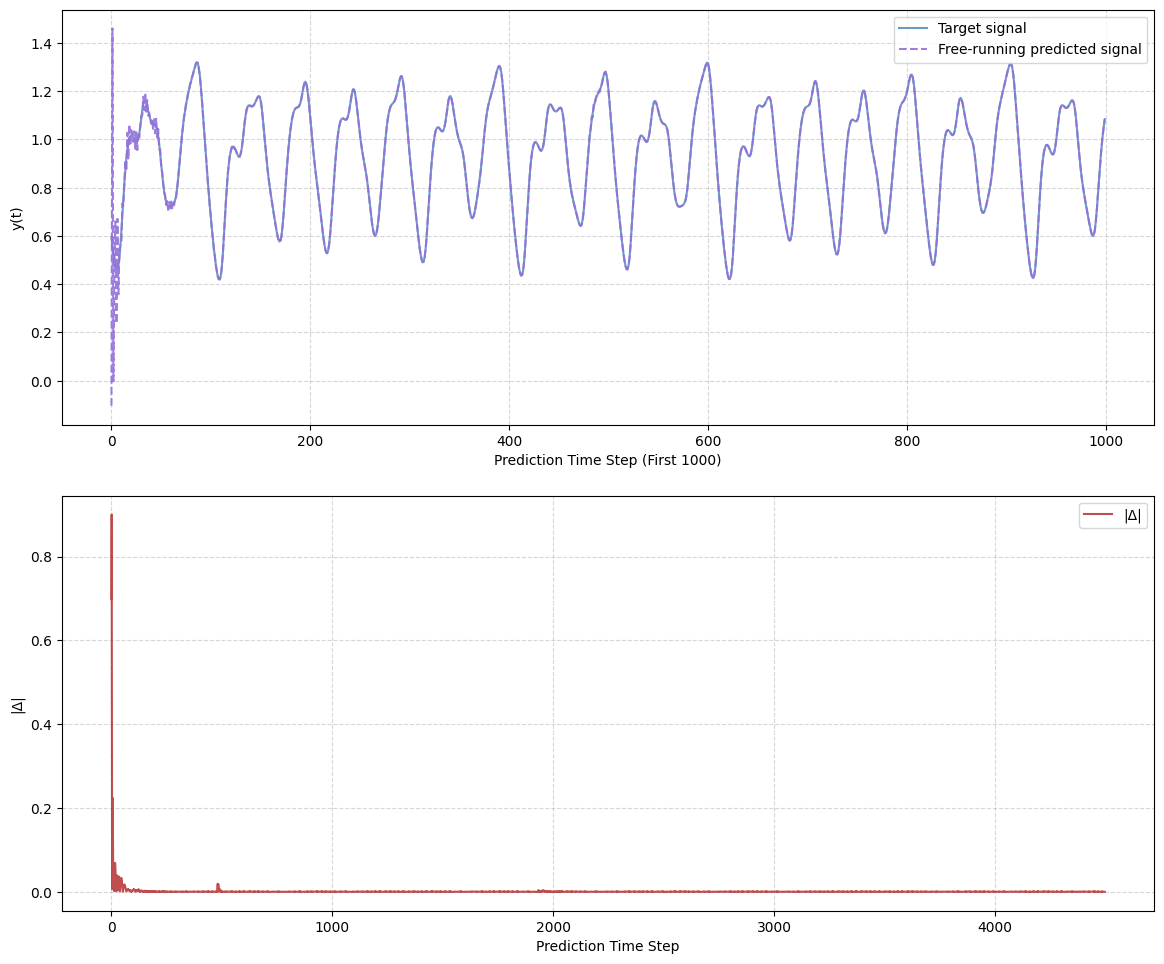

In [26]:
predictionAnalysis(predictionsTwoNode, actualsTwoNode, zoom_limit=1000)

In [31]:
paramsHenonTwoNode = {
    'inputSize': 2,          
    'numVirtualNodes': 800,
    'outputSize': 2,
    'theta': 0.04,
    'tau': 2.0,
    'eta': 0.5,
    'gamma': 0.1,
    'maskScaling': 0.1,
    'integrationStep': 0.1,
    'randomSeed': 42
}

In [32]:
modelTwoNodeHenon = TwoNodeDelayESN(**paramsHenonTwoNode)

In [36]:
pipelineTwoNodeHenon = DelayPipeline(esn_model=modelTwoNodeHenon)

In [37]:
predictionsHenon, actualsHenon, metricsHenon, internal_statesHenon = pipelineTwoNodeHenon.run(
    henonSeries,
    trainRatio=0.7,
    predictionHorizon=1,
    washout_train=500,
    washout_pred=0,
)

In [39]:
metricsHenon

{'mse': 1.0441441295545317,
 'rmse': np.float64(1.0218337093453767),
 'mae': 0.2707921433759075,
 'nrmse': np.float64(0.6147716116193899)}

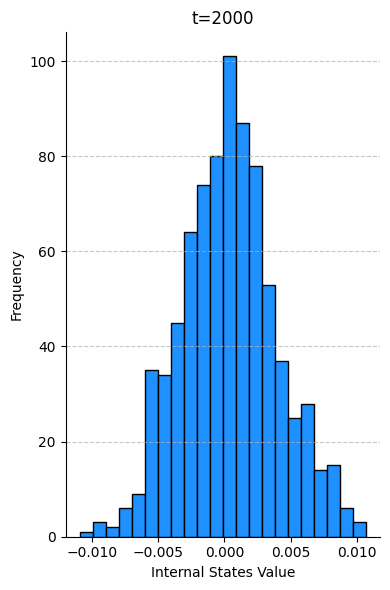

In [53]:
internalStatesHistogram(
    states=internal_statesHenon,
    time_step_index=2000,
    reservoir_size=paramsHenonTwoNode['numVirtualNodes'],
)

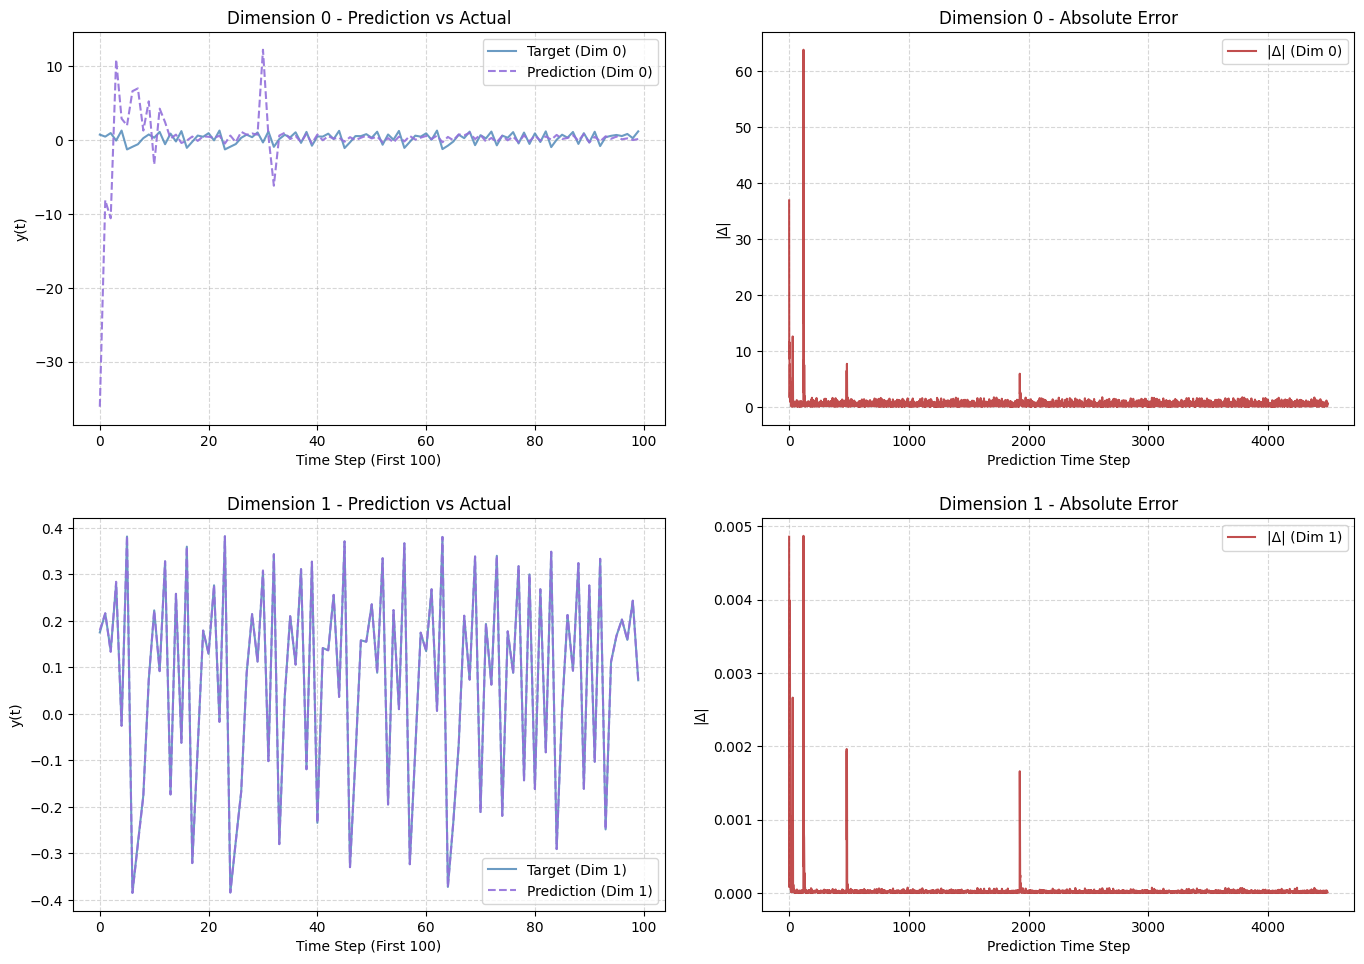

In [48]:
predictionAnalysisNDim(predictionsHenon, actualsHenon, zoom_limit=100)